In [133]:
import numpy as np
from datascience import *
%matplotlib inline

In [134]:
# Table
minard = Table().read_table('minard.csv')
minard
minard.num_columns
minard.num_rows
minard.labels
minard.relabeled('City', 'City Name')
minard.column('Survivors')
minard.column('Survivors').item(0)
minard = minard.with_columns(
    'Percent Surviving', minard.column('Survivors')/minard.column('Survivors').item(0)
)
minard
minard.set_format('Percent Surviving', PercentFormatter)
minard.select('Longitude', 'Latitude')
minard.drop('Longitude', 'Latitude', 'Direction')
minard

Longitude,Latitude,City,Direction,Survivors,Percent Surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


In [135]:
# Table Sorting
nba_salaries = Table.read_table('nba_salaries.csv')
nba_salaries
#nba_salaries.show(20)
#nba_salaries.sort('PLAYER').show(3)
nba = nba_salaries.relabeled("2015-2016 SALARY", 'SALARY')
nba = nba.sort('SALARY', descending=True)
#help(nba.sort)
nba.take(0)
nba.take(np.arange(3,6))
nba.where('SALARY', are.above(20))
nba.where('PLAYER', are.equal_to('Stephen Curry'))
nba.where('TEAM', 'Houston Rockets')
nba.where('POSITION', 'PG').where('SALARY', are.above(15))
nba.where('SALARY', are.between(10, 10.3))
nba.where('TEAM', are.containing('Warriors'))
nba.where('POSITION', are.containing('P'))

PLAYER,POSITION,TEAM,SALARY
Chris Bosh,PF,Miami Heat,22.1927
Chris Paul,PG,Los Angeles Clippers,21.4687
Derrick Rose,PG,Chicago Bulls,20.0931
LaMarcus Aldridge,PF,San Antonio Spurs,19.689
Kevin Love,PF,Cleveland Cavaliers,19.689
Blake Griffin,PF,Los Angeles Clippers,18.9077
Paul Millsap,PF,Atlanta Hawks,18.6717
Russell Westbrook,PG,Oklahoma City Thunder,16.7442
Kyrie Irving,PG,Cleveland Cavaliers,16.4075
John Wall,PG,Washington Wizards,15.852


In [136]:
# Population Trends
full_census_table = Table().read_table('nc-est2015-agesex-res.csv')
full_census_table
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014')
partial_census_table
us_pop = partial_census_table.relabel('POPESTIMATE2010', '2010').relabel('POPESTIMATE2014', '2014')
us_pop
change = us_pop.column('2014') - us_pop.column('2010')
census = us_pop.with_columns(
    'CHANGE', change,
    'CHANGE PERCENTAGE', change/us_pop.column('2010'),
)
census.set_format('CHANGE PERCENTAGE', PercentFormatter)
census.sort('CHANGE', descending=True)

SEX,AGE,2010,2014,CHANGE,CHANGE PERCENTAGE
0,999,309346863,318907401,9560538,3.09%
1,999,152088043,156955337,4867294,3.20%
2,999,157258820,161952064,4693244,2.98%
0,67,2693707,3485241,791534,29.38%
0,64,2706055,3487559,781504,28.88%
0,66,2621335,3347060,725725,27.69%
0,65,2678525,3382824,704299,26.29%
0,71,1953607,2519705,566098,28.98%
0,34,3822189,4364748,542559,14.19%
0,23,4217228,4702156,484928,11.50%


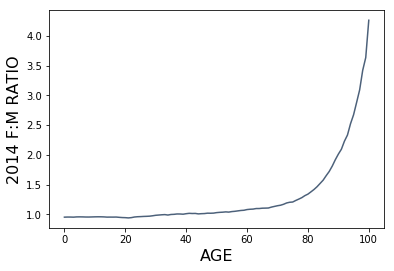

In [143]:
# Trends in Gender
us_pop
us_pop.where('SEX', 0).where('AGE', are.between(97,101))
us_pop_2014 = us_pop.drop('2010')
all_ages_2014 = us_pop_2014.where('AGE', 999)
all_ages_2014.with_column(
    'Proportion', all_ages_2014.column('2014')/all_ages_2014.column('2014').item(0),
).set_format('Proportion', PercentFormatter)

infants_2014 = us_pop.where('AGE', 0).drop('2010')
infants_2014.with_column(
    'Proportion', infants_2014.column('2014')/infants_2014.column('2014').item(0)
).set_format('Proportion', PercentFormatter)

ratios = Table().with_columns(
    'AGE', us_pop_2014.where('SEX', 0).column('AGE'),
    '2014 F:M RATIO', us_pop_2014.where('SEX', 2).column('2014')/us_pop_2014.where('SEX', 1).column('2014')
).set_format('2014 F:M RATIO', PercentFormatter)
ratios
#ratios.where('AGE', are.above(75)).show()
ratios.where('AGE', are.not_equal_to(999)).plot('AGE')